In [2]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

import os
os.chdir("/content/gdrive/My Drive/") # 切換目錄
!ls -l "/content/gdrive/My Drive/112_2_LATIA/"

Mounted at /content/gdrive/
total 414
-rw------- 1 root root  92484 Feb 27 06:21 112_student.csv
-rw------- 1 root root  20655 Mar 12 07:02 112_students_tf.csv
-rw------- 1 root root 309767 Feb 27 07:13 week2_0227.ipynb


In [5]:
import pandas as pd

csv_file = '112_ab111_C.csv'
df = pd.read_csv(csv_file)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   學年度                         164 non-null    int64 
 1   洲別                          164 non-null    object
 2   國別                          164 non-null    object
 3   學位生_正式修讀學位外國生               164 non-null    int64 
 4   學位生_僑生(含港澳)                 164 non-null    int64 
 5   學位生_正式修讀學位陸生                164 non-null    int64 
 6   非學位生_外國交換生                  164 non-null    int64 
 7   非學位生_外國短期研習及個人選讀            164 non-null    int64 
 8   非學位生_大專附設華語文中心學生            164 non-null    int64 
 9   非學位生_大陸研修生                  164 non-null    int64 
 10  非學位生_馬來西亞華裔青年來台就學輔導及技職研習專班  164 non-null    int64 
 11  境外專班                        164 non-null    int64 
dtypes: int64(10), object(2)
memory usage: 15.5+ KB
None
         學年度  學位生_正式修讀學位外國生  學位生_僑生(含港澳)  學位生_正式修讀學位陸生

In [6]:
import pandas as pd

csv_file = '112_ab111_S.csv'
df = pd.read_csv(csv_file)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   學年度                         146 non-null    int64 
 1   學校類型                        146 non-null    object
 2   學校代碼                        146 non-null    object
 3   學校名稱                        146 non-null    object
 4   學位生_正式修讀學位外國生               146 non-null    int64 
 5   學位生_僑生(含港澳)                 146 non-null    int64 
 6   學位生_正式修讀學位陸生                146 non-null    int64 
 7   非學位生_外國交換生                  146 non-null    int64 
 8   非學位生_外國短期研習及個人選讀            146 non-null    int64 
 9   非學位生_大專附設華語文中心學生            146 non-null    int64 
 10  非學位生_大陸研修生                  146 non-null    int64 
 11  非學位生_馬來西亞華裔青年來台就學輔導及技職研習專班  146 non-null    int64 
 12  境外專班                        146 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 15.0+ KB
Non

問題1 外國生前五名的學校

--2024-04-07 08:55:07--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.2.113, 142.251.2.101, 142.251.2.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-04-07 08:55:07--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  26.3MB/s    in 0.8s    

2024-04-07 08:55:10 (26

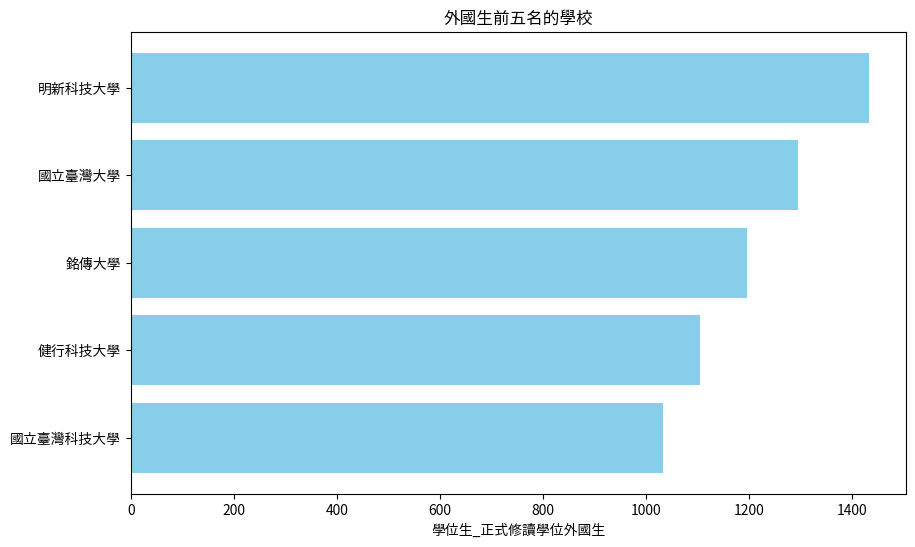

In [12]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')
# 讀取CSV檔案
data = pd.read_csv('112_ab111_C.csv')

# 問題一：哪些國家/地區在學位生_正式修讀學位外國生方面表現最好？
top_5_foreign_students = df.nlargest(5, '學位生_正式修讀學位外國生')
print("外國生前五名的學校：")
print(top_5_foreign_students[['學校名稱', '學位生_正式修讀學位外國生']])
# 繪製水平條形圖
plt.figure(figsize=(10, 6))
plt.barh(top_5_foreign_students['學校名稱'], top_5_foreign_students['學位生_正式修讀學位外國生'], color='skyblue')
plt.xlabel('學位生_正式修讀學位外國生')
plt.title('外國生前五名的學校')
plt.gca().invert_yaxis()  # 反轉 y 軸，使得學校名稱顯示順序與圖表中的順序相符
plt.show()


問題2 非學位外國交換生的國家前十名

--2024-04-07 08:58:50--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.2.138, 142.251.2.101, 142.251.2.113, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-04-07 08:58:50--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  33.1MB/s    in 0.6s    

2024-04-07 08:58:52 (33

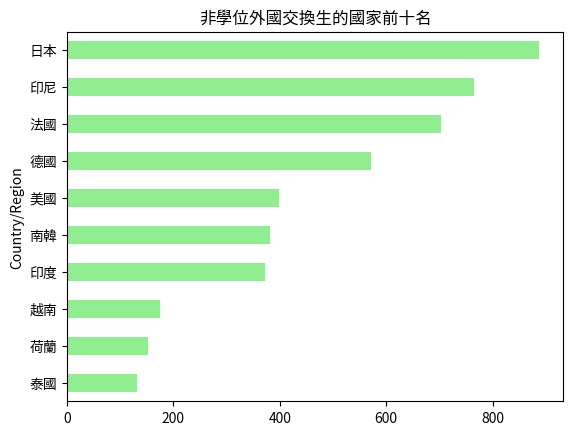

In [13]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')
# 讀取CSV檔案
data = pd.read_csv('112_ab111_C.csv')
top_10_exchange = data.sort_values(by='非學位生_外國交換生', ascending=False).head(10)
top_10_exchange.plot(kind='barh', x='國別', y='非學位生_外國交換生', color='lightgreen', legend=None)
print("非學位外國交換生的國家前十名：")
print(top_10_exchange[['國別', '非學位生_外國交換生']])
plt.ylabel('Country/Region')
plt.title('非學位外國交換生的國家前十名')
plt.gca().invert_yaxis()
plt.show()

問題3  有學位外國生州的比例

--2024-04-07 09:05:42--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.2.113, 142.251.2.139, 142.251.2.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-04-07 09:05:42--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  43.5MB/s    in 0.5s    

2024-04-07 09:05:44 (43

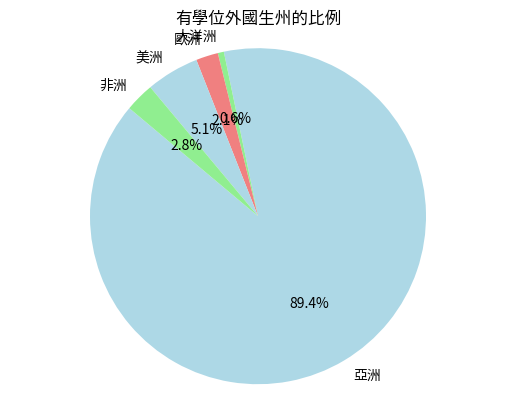

In [19]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')
# 讀取CSV檔案
data = pd.read_csv('112_ab111_C.csv')
continent_wise_degree_students = data.groupby('洲別')['學位生_正式修讀學位外國生'].sum()
continent_wise_degree_students.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral'])
# 計算每個州的學位外國生比例
total_students = continent_wise_degree_students.sum()
continent_wise_degree_students_percentage = (continent_wise_degree_students / total_students) * 100

# 列印每個州的學位外國生比例
print("各州的學位外國生比例：")
print(continent_wise_degree_students_percentage)
plt.axis('equal')
plt.title('有學位外國生州的比例')
plt.ylabel('')
plt.show()

問題4 不同學校類型中不同類型學位生的分布數量

--2024-04-07 09:21:42--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.2.139, 142.251.2.101, 142.251.2.113, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-04-07 09:21:42--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  36.1MB/s    in 0.5s    

2024-04-07 09:21:44 (36

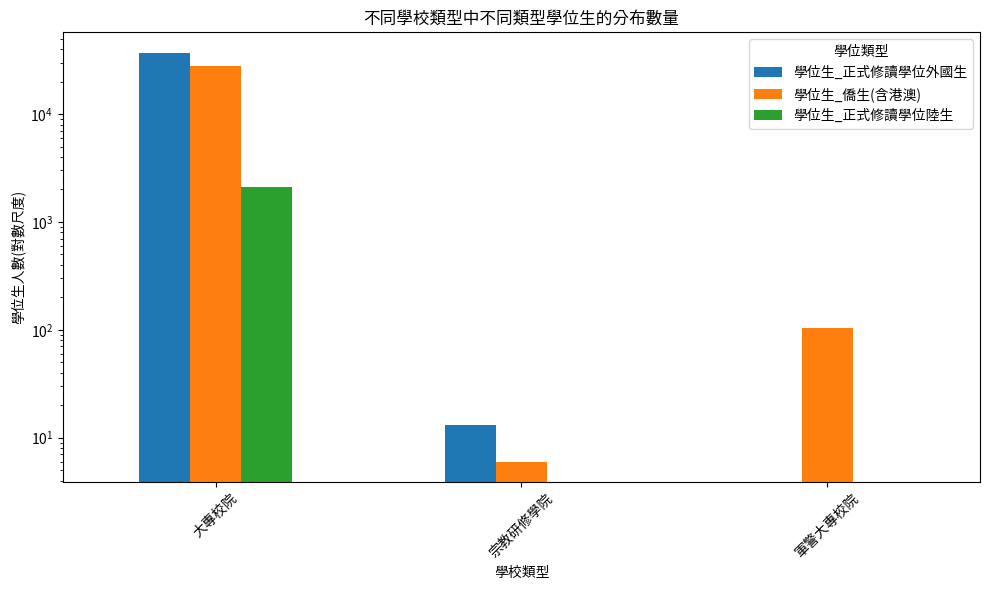

不同學校類型中不同類型學位生的分布數量：
        學位生_正式修讀學位外國生  學位生_僑生(含港澳)  學位生_正式修讀學位陸生
學校類型                                            
大專校院            37049        27999          2128
宗教研修學院             13            6             0
軍警大專校院              0          104             0


In [32]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

# 讀取CSV檔案
data = pd.read_csv('112_ab111_S.csv')
degree_total = data.groupby('學校類型')[['學位生_正式修讀學位外國生', '學位生_僑生(含港澳)', '學位生_正式修讀學位陸生']].sum()

# 繪製長條圖
degree_total.plot(kind='bar', figsize=(10, 6))
plt.yscale('log')
plt.title('不同學校類型中不同類型學位生的分布數量')
plt.xlabel('學校類型')
plt.ylabel('學位生人數(對數尺度)')
plt.xticks(rotation=45)
plt.legend(title='學位類型')
plt.tight_layout()
plt.show()

print("不同學校類型中不同類型學位生的分布數量：")
print(degree_total)



問題5 各學校的有學位僑生(含港澳)人數前五名學校

--2024-04-07 09:10:40--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.2.100, 142.251.2.113, 142.251.2.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-04-07 09:10:41--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  31.1MB/s    in 0.6s    

2024-04-07 09:10:42 (31

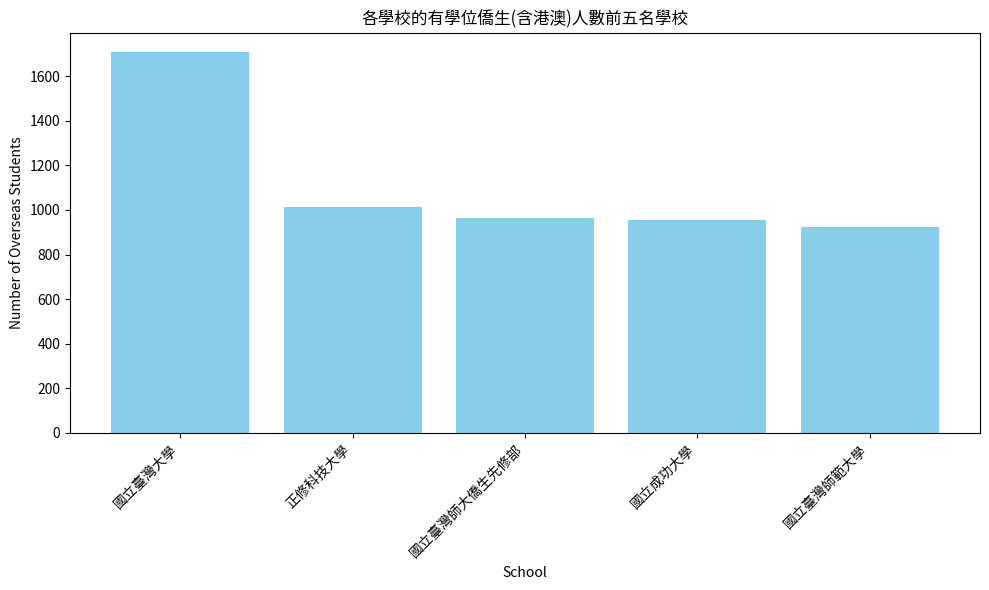

In [22]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')
# 讀取CSV檔案
data = pd.read_csv('112_ab111_S.csv')
top_5_overseas_students = df.nlargest(5, '學位生_僑生(含港澳)')
print("各學校的有學位僑生(含港澳)人數前五名學校:")
for index, row in top_5_overseas_students.iterrows():
    print(f"{row['學校名稱']}: {row['學位生_僑生(含港澳)']} 人")

# 繪製長條圖
plt.figure(figsize=(10, 6))
plt.bar(top_5_overseas_students['學校名稱'], top_5_overseas_students['學位生_僑生(含港澳)'], color='skyblue')
plt.title('各學校的有學位僑生(含港澳)人數前五名學校')
plt.xlabel('School')
plt.ylabel('Number of Overseas Students')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

問題6 各類型學校的學位生外國生總和

--2024-04-07 09:17:16--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.2.138, 142.251.2.101, 142.251.2.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-04-07 09:17:17--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  42.0MB/s    in 0.5s    

2024-04-07 09:17:19 (42

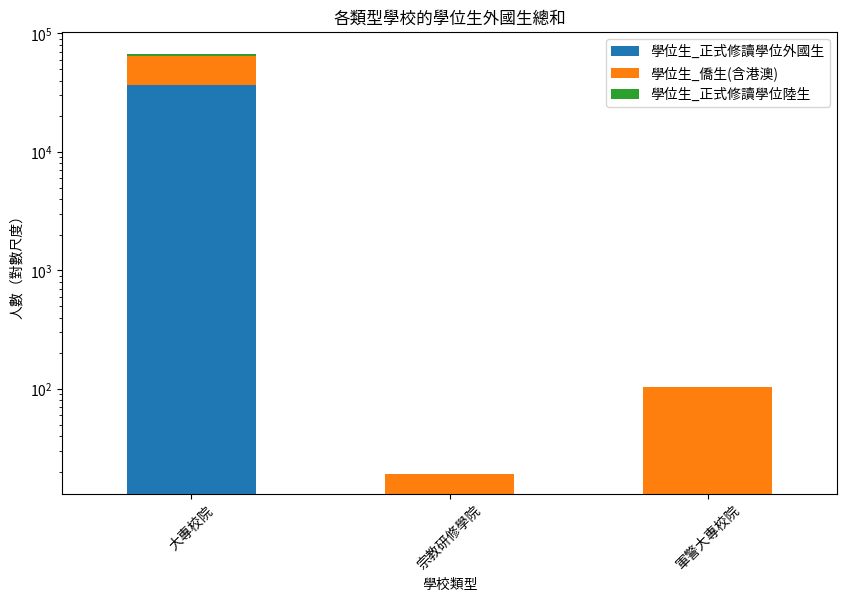

In [28]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')
# 讀取CSV檔案
data = pd.read_csv('112_ab111_S.csv')
grouped_by_school_type = df.groupby('學校類型').sum()[['學位生_正式修讀學位外國生', '學位生_僑生(含港澳)', '學位生_正式修讀學位陸生']]
print("各類型學校的學位生外國生總和:")
print(grouped_by_school_type)
grouped_by_school_type.plot(kind='bar', stacked=True, figsize=(10, 6), title='各類型學校的學位生外國生總和')
plt.yscale('log')
plt.xlabel('學校類型')
plt.ylabel('人數（對數尺度）')
plt.xticks(rotation=45)
plt.show()